# Text Analysis - Florent Andre

# Summary

In this analysis, I will the analyse the customer's sentiments from reviews by Amazon users left up to October 2012

In [1]:
# Importing all libraries 
# For data and matrix manipulation
import pandas as pd
import numpy as np
# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cufflinks as cf
import plotly.graph_objs as go
from chart_studio.plotly import iplot
import pyLDAvis.gensim  # Visualise topics
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
# For string manipulation
import re 
import string
# For text pre-processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag  # Tag words with parts of speech
from collections import defaultdict  # Dictionaries that have a backup value
# Necessary dependencies from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from textblob import TextBlob # For assigning sentiment polarity scores
from sklearn.feature_extraction.text import CountVectorizer # For extracting features such as the document-term matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.metrics import accuracy_score, classification_report # To evaluate the models 
from gensim.models.ldamodel import LdaModel  # Topic extraction
from gensim.models.phrases import Phrases  # ngrams
from gensim import corpora  # Vectorization

# Ignore pink warnings
import warnings
warnings.filterwarnings('ignore')

#from PIL import Image
#from tqdm import tqdm
#import os
#import random

C:\Program Files\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning:

invalid escape sequence \d

C:\Program Files\Anaconda3\lib\site-packages\nose\config.py:178: DeprecationWarning:

invalid escape sequence \.

C:\Program Files\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly

C:\Program Files\Anaconda3\lib\site-packages\nltk\featstruct.py:1296: DeprecationWarning:

invalid escape sequence \d

C:\Program Files\Anaconda3\lib\site-packages\nltk\featstruct.py:2092: DeprecationWarning:

invalid escape sequence \d

C:\Program Files\Anaconda3\lib\site-packages\nltk\sem\evaluate.py:311: DeprecationWarning:

invalid escape sequence \ 

C:\Program Files\Anaconda3\lib\site-packages\nltk\sem\relextract.py:135: DeprecationWarning:

invalid escape sequence \w

C:\Program Files\Anaconda3\lib\site-packages\nltk\sem\relextract.py:414: DeprecationWarning:

inv

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\bracket_parse.py:214: DeprecationWarning:

invalid escape sequence \.

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\xmldocs.py:233: DeprecationWarning:

invalid escape sequence \s

C:\Program Files\Anaconda3\lib\site-packages\nltk\toolbox.py:210: DeprecationWarning:

invalid escape sequence \_

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\bnc.py:29: DeprecationWarning:

invalid escape sequence \w

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\switchboard.py:116: DeprecationWarning:

invalid escape sequence \w

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\childes.py:282: DeprecationWarning:

invalid escape sequence \d

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\framenet.py:2761: DeprecationWarning:

invalid escape sequence \w

C:\Program Files\Anaconda3\lib\site-packages\nltk\corpus\reader\udhr.py:31: DeprecationWarning:

invalid

# Importing the data

In [2]:
df = pd.read_csv("Reviews.csv")
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [3]:
df.shape

(568454, 10)

## What is of interest
Let's get an overview of the Score Column

In [4]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

### Frequency of each score label in %
This allows us to have a clear overall understanding on the performances.

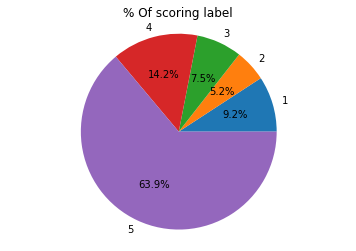

In [5]:
review = [52268,29769,42640,80655,363122]

my_labels = [1, 2, 3, 4, 5]
plt.pie(review,labels=my_labels,autopct='%1.1f%%')
plt.title('% Of scoring label')
plt.axis('equal')
plt.show()

## Next

I will capture the "text" column only.

In [6]:
df = df[["Text"]]

# Data cleansing

## Text cleansing for Punctuation

I will carry out the cleansing of text through multiple steps.

In [7]:
# Pull a random text to check potential problems.
df["Text"].iloc[2082]

'I got two Teas and one type of iced coffe and the rest were HOLIDAY COFFEES and APPLE CIDER!  Spicy Eggnog? Gingerbread? Bait and swtich.  The only redeeming factor - Amazon was great and issued me a refund.'

In [8]:
# Convert everything to lower case for simplicity
df["Text"] = df["Text"].str.lower()
# Remove @, & and #, 
df["Text"] = df["Text"].replace(to_replace=r"[#@&]\w\s\+", value=" ", regex=True)
# Deal with quote marks being difficult
df["Text"] = df["Text"].replace(to_replace="(\u2019)", value="'", regex=True)
# Replace the most common contractions
df["Text"] = df["Text"].replace(to_replace="n't", value=" not", regex=True)
df["Text"] = df["Text"].replace(to_replace="it's", value="it is", regex=True)
df["Text"] = df["Text"].replace(to_replace="i've", value="i have", regex=True)
df["Text"] = df["Text"].replace(to_replace="i'm", value="i am", regex=True)
df["Text"] = df["Text"].replace(to_replace="'s", value="", regex=True)
# Remove ampersands
df["Text"] = df["Text"].replace(to_replace=r"&amp", value="", regex=True)
# Remove links
df["Text"] = df["Text"].replace(to_replace=r"http[s]?:\/\/[^\s]+", value="", regex=True)
# Remove numbers
df["Text"] = df["Text"].replace(to_replace=r"\d+", value="", regex=True)
# Remove standard punctuation and replace with spaces
df["Text"] = df["Text"].replace(to_replace=r"\W", value=" ", regex=True)
# Remove extra spaces
df["Text"] = df["Text"].replace(to_replace=r"\s+", value=" ", regex=True)

In [9]:
df["Text"].iloc[2082]

'i got two teas and one type of iced coffe and the rest were holiday coffees and apple cider spicy eggnog gingerbread bait and swtich the only redeeming factor amazon was great and issued me a refund '

## Text cleansing for Words

I will Tokenize the column Text so whatever is unstructured will become more usable at a later stage when I will use my machine learning models.

I will use lemmatisation to reduce the words back to their roots, such as "went" and "going" to "Go"

I will also use stopwords which remove all words that don't add any value to my analysis.

#### Tokenization 

In [10]:
# Tokenise the words so they can be dealt with individually
df["Text"] = df["Text"].apply(word_tokenize)

#### Words removal

In [13]:
# Creating of an Ad-Hoc list of specific words wanted removed.
newStopWords = ['amazon']
# Main common stopwords list.
stopwords = nltk.corpus.stopwords.words('english')
# Adding Ad-hoc list to the main list
stopwords.extend(newStopWords)

In [14]:
# Filter the words by removing the words from the stopwords list and words with <=3 letters
df["Text"] = df["Text"].apply(lambda x: [y for y in x if y not in stopwords and len(y) > 3])

#### Lemmatisation

In [15]:
# Object to lemmatize words 
lemma = WordNetLemmatizer()

# Dictionary to convert between part-of-speech tags and the ones the lemmatizer understands
tag_dict = defaultdict(lambda : wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV

# function to lemmatize a sentence
def get_lemma(word):
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

# Perform the lemmatization
df["Text"] = df["Text"].apply(lambda x: [get_lemma(word) for word in x])

KeyboardInterrupt: 

In [16]:
from multiprocessing import Pool

def lemmed(text, cores=6): # tweak cores as needed
    with Pool(processes=cores) as pool:
        wnl = WordNetLemmatizer()
        result = pool.map(wnl.lemmatize, text)
    return result

# Perform the lemmatization
df["Text"] = df["Text"].apply(lambda x: [lemmed(text, cores=6) for word in x])

NameError: name 'text' is not defined

In [ ]:
# Join the lists of words back into strings
df["Text"] = df["Text"].apply(lambda x: " ".join(x))

In [ ]:
df["Text"].iloc[2082]

# Data Exploration
Possible exploration of specific word within the data

In [ ]:
search_term = input("word: ")
df[df["Text"].str.contains(search_term)]["Text"].count()

# Modelling
Creating multiple models to visualise and analyse various aspect of the data.

## Bag of Word Model

### Create a document-term matrix

In [ ]:
# Create an object that converts strings into a sparse matrix
vectorizer = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,1))
# Convert the text column to a sparse matrix
df_dtm = vectorizer.fit_transform(df["Text"])

### Creation of a dataframe with terms and their frequencies

In [ ]:
# Get the frequency of each term
term_frequencies = df_dtm.sum(axis=0)
# Match frequencies to terms
frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]
# Convert the word-frequency pairings to a dataframe
term_df = pd.DataFrame(columns=["term", "frequency"], data=frequent_terms)
# Sort the dataframe
term_df.sort_values(by="frequency", ascending=False, inplace=True)

## Bag of Word Visualisation - Barplot

In [ ]:
fig = px.bar(term_df.head(20), x="frequency", y="term", title='The 20 most Commmon terms', orientation='h', 
             width=700, height=700, color="term")
fig.show()

## Visualisation - Wordcloud of the most frequent terms

In [ ]:
# Creating a dictionary of the most frequent terms (required for word clouds)
term_dict = term_df.set_index('term')['frequency'].to_dict()
# Create a wordcloud of most frequent terms
wc = WordCloud(width=800, height=300, background_color="black", max_words=75)
wc.generate_from_frequencies(term_dict)
# Display the cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="kaiser")
plt.axis("off")
plt.show()

## Visualisation of the most 30 positive and most negative terms

In [ ]:
# Assign sentiment to each term
term_df["sentiment"] = term_df["term"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Creating a dataframe capturing the 30 worst feedback from customers
top_30_negative = term_df.sort_values(by="sentiment", ascending=True)[["term", "frequency", "sentiment"]].head(30)
# plot
fig = px.treemap(top_30_negative, path=['term'], values='frequency',title='Most Common Negative Terms')
fig.show()

In [ ]:
# Creating a dataframe capturing the 30 best feedback from customers
top_30_positive = term_df.sort_values(by="sentiment", ascending=False)[["term", "frequency", "sentiment"]].head(30)
# plot
fig = px.treemap(top_30_positive, path=['term'], values='frequency',title='Most Common Positive Terms')
fig.show()

In [ ]:
# Create a dictionary of most frequent terms ((required for word clouds)
top_30_negative_dict = top_30_negative.set_index('term')['sentiment'].to_dict()
# Create a wordcloud of most frequent terms
wc_N = WordCloud(width=800, height=300, background_color="white",max_words=75)
wc_N.generate_from_frequencies(top_30_negative_dict)
# Display the cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc_N, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create a dictionary of most frequent terms ((required for word clouds)
top_30_positive_dict = top_30_positive.set_index('term')['sentiment'].to_dict()
# Create a wordcloud of most frequent terms
wc_P = WordCloud(width=800, height=300, background_color="white",max_words=75)
wc_P.generate_from_frequencies(top_30_positive_dict)
# Display the cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc_P, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis model

Investigation of the sentiments of the comment in "Text", using the library textblob.

In [ ]:
# Assign sentiment to each comment
df["sentiment"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Print visualisations from cufflinks library offline
cf.go_offline()

# Plot an interactive distribution plot of sentiment scores in plotly
df['sentiment'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    theme = 'pearl',
    colorscale = 'plotly',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

## Text Classification model

Building a machine learning model to predict the sentiment of the feedback from the customers

In [ ]:
# Creating a new column to categorises sentiment
df['sentiment_category'] = np.where(df['sentiment'] > 0.125, 'Positive', 
                                          np.where(df['sentiment'] < -0.025, "Negative", 'Neutral'))

In [ ]:
# Creating an Histogram to view the frequency of each sentiments
fig = px.histogram(df, x="sentiment_category",color="sentiment_category")
fig.update_layout(
    title_text='Sentiment of Comments', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, 
    bargroupgap=0.1
)
fig.show()

In [ ]:
# Dropping the 'sentiments' column as it is now redundant to use.
df.drop('sentiment', axis=1, inplace=  True)
df.head(1)

In [ ]:
# Using the bag-of-words model.
vector = CountVectorizer(max_features= 10000 , min_df=0.01, ngram_range= (1,1))

## Train Test Split model

In [ ]:
# train_test_split function
x_train, x_test, y_train, y_test = train_test_split(df['Text'], df['sentiment_category'],  
                                                   test_size = 0.3, random_state = 123)

In [ ]:
# Checking the split
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

In [ ]:
# Applying the bag of words model to the entire text using the fit function
vector.fit(df['Text'])

In [ ]:
# Feature transformation to both x_train, and x_test
x_train_bow = vector.transform(x_train)
x_test_bow = vector.transform(x_test)

In [ ]:
# Checking the number of features 
print(x_train_bow.shape, x_test_bow.shape)

## Machine learning algorithms

I will compare a Naive Bayes model and a Decision Tree model and make a decision on the final model to use based on the accuracy result.

### Naive Bayes

In [ ]:
# Creating a Multinomial Naive Bayes classifier
nb = MultinomialNB()
# Train the model using the training sets
nb.fit(x_train_bow, y_train)
# Predict Output
predictions = nb.predict(x_test_bow)

In [ ]:
# Print the accuracy score
accuracy_score(y_test, predictions)

### Decision tree

In [ ]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()
# Train Decision Tree Classifer
tree = tree.fit(x_train_bow, y_train)
# Predict the response for test dataset
predictions_tree = tree.predict(x_test_bow)

In [ ]:
accuracy_score(y_test, predictions_tree)

### Classification report

Printing the classification report based on the Decision Tree model.

In [ ]:
# Decision Tree
print(classification_report(y_test, predictions_tree))

### Conclusion Text Classification.

My prediction data label correctly Positive sentiments with 91% accuracy, label Negative sentiments correctly with an accuracy of 66% which needs improvement, and label Neutral sentiment correctly with an accuracy of 63%.

Through recall, I can conclude that 90% positive sentiments were classified correctly, and 62% for the negative sentiments.

## Topic Analysis

In [ ]:
# extract just the Text column as a list of lists
df_topics = list(df["Text"].apply(lambda x: x.split(" ")))
# Create a gensim dictionary of terms from the Text and map each word to an id
topic_dict = corpora.Dictionary(df_topics)
# Use the dictionary to generate a corpus from Text and convert the keywords into dictionary references
topic_corpus = [topic_dict.doc2bow(text) for text in df_topics]

In [ ]:
# I will identify 5 topics, at random
topic_model = LdaModel(topic_corpus, num_topics=5, id2word=topic_dict, passes=15)

In [ ]:
# Create the visualisation display 
lda_display = pyLDAvis.gensim.prepare(topic_model, topic_corpus, topic_dict, sort_topics=True)
# Display the visualisation
pyLDAvis.display(lda_display)

### Conclusion of the Topic Analysis

The above LDA display allows us to see the 30 most common terms per Topic, distributed, for this exercise in 5 different Topics, while indicating the most important Topic, represented by the bubble's sizes.

Within each topic, I can see the frequency of a term overall and the frequency of that same term within a specific topic. I can also visualise in which Topic a term appears, and its frequency represented by the bubble's sizes.

In term of importance of each topic over the entire corpus. Topic 1 is the most important Topic capturing 29.6% of the terms, followed by 2 with 24.1%, then 3 with 19.8%. Topic 4 captures 17.1% of the terms and, lastly, 5 captures 9.4%.

Based on the words captured in each Topics, Topic 1 and 2 are capturing most of the positive terms. The remaining bubbles captures more neutral words which I could add to the stop_words and run the analyse again to check the new result.